Idea
* 두(또는 세) 자산의 비중 합이 일정 비율일 때 구해보기
ex. 삼전 + 하이닉스 50%일 경우

* Trick! 두 개 이상의 무위험자산이 나올 경우 -> 가장 수익률이 높은 무위험자산 채택

### 여러분들은 자금을 받아 펀드를 운용하는 펀드매니저입니다. 어느날, 한 고객이 찾아와 돈을 맡기면서 다음의 조건에 맞는 포트폴리오를 구성해달라고 합니다. 이를 바탕으로 다음의 질문에 답하시오.

- 다음의 주식들로 포트폴리오를 구성: 삼성전자, 엔씨소프트, SK하이닉스, 카카오, 네이버
- 2019.1.1 ~ 2020.1.1의 일별데이터를 사용.
- 수익률은 ${P_t - P_{t-1}}\over{P_{t-1}}$로 구함. 이때, $t$는 daily frequency를 의미함.
- 위험자산 중 60%는 삼성전자 주식으로 구성(무위험자산은 고려 x).
- 포트폴리오에 포함되는 모든 자산의 가중치는 0 ~ 100% 사이.
- 위험 한 단위 대비 기대수익률이 가장 높은 포트폴리오를 구성.

1. 삼성전자의 가중치는 60%로 고정하고, 나머지 가중치들을 무작위로 부여한 random portfolio를 5,000개 생성해 위험자산들로만 이루어진 mean-variance frontier를 도출하시오.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import pandas_datareader.data as web
import datetime

def ret_std(weight, ret) :
    port_mean = np.sum(weight * ret.mean() * 252) # 가중치 * 일별 수익률의 평균 
    port_var = np.dot(weight.T , np.dot(ret.cov() * 252 , weight)) 
    #분산을 구하기 위해서는 행렬 간의 곱을 해야하므로 np.dot() 메소드 사용
    port_std = np.sqrt(port_var)
    return port_mean, port_std

port_rets = []
port_std = []


start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2020, 1, 1)
data = pd.DataFrame()

for code in ['005930', '036570', '000660', '035720', '035420'] :
    data = pd.concat([data, web.DataReader(code, 'naver', start, end)['Close'].apply(int)], axis = 1)

data.columns = ['se', 'ncs', 'skh', 'kko', 'nvr']

print(data)

               se     ncs    skh    kko     nvr
2019-01-02  38750  467000  60600  20473  118000
2019-01-03  37600  454500  57700  20573  122000
2019-01-04  37450  464000  58300  20774  125500
2019-01-07  38750  472500  58700  20673  131500
2019-01-08  38100  469000  59200  20051  130000
...           ...     ...    ...    ...     ...
2019-12-23  55500  540000  94600  29806  184000
2019-12-24  55000  533000  93800  29405  182000
2019-12-26  55400  537000  94800  29706  180500
2019-12-27  56500  541000  96000  30810  183500
2019-12-30  55800  541000  94100  30810  186500

[246 rows x 5 columns]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import pandas_datareader.data as web
import datetime

def ret_std(weight, ret) :
    port_mean = np.sum(weight * ret.mean() * 252) # 가중치 * 일별 수익률의 평균 
    port_var = np.dot(weight.T , np.dot(ret.cov() * 252 , weight)) 
    #분산을 구하기 위해서는 행렬 간의 곱을 해야하므로 np.dot() 메소드 사용
    port_std = np.sqrt(port_var)
    return port_mean, port_std

port_rets = []
port_std = []


start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2020, 1, 1)
data = pd.DataFrame()

for code in ['005930', '036570', '000660', '035720', '035420'] :
    data = pd.concat([data, web.DataReader(code, 'naver', start, end)['Close'].apply(int)], axis = 1)

data.columns = ['se', 'ncs', 'skh', 'kko', 'nvr']

noa = len(data.columns)
ret = data.pct_change().dropna()

for i in range(5000) :
    rweight = np.random.random(4) #난수를 만들어줘야지!
    rweight /= sum(rweight)
    rweight *= 0.4
    weight = np.array([0.6])
    weight = np.append(weight, rweight)

    mu, sig = ret_std(weight, ret)
    port_rets.append(mu)
    port_std.append(sig)

sr = np.array(port_rets) / np.array(port_std)

plt.style.use('seaborn')
plt.figure(figsize = (12, 8))
plt.scatter(port_std, port_rets, 
            c = np.array(port_rets) / np.array(port_std),marker = '.')
'''
#plt.plot(tvols, trets)
#plt.legend()
'''
plt.grid(True)
plt.ylabel('expected return $(μ)$')
plt.xlabel('expected std $(σ)$')
plt.colorbar(label = 'Sharpe Ratio')
'''
#Mean-variance frontier는 이 점들의 표면을 이어놓은 점들 (이라고 따로 기술하거나 직접 plot로 그려줘야 함)
'''

                  se       ncs       skh       kko       nvr
2019-01-03 -0.029677 -0.026767 -0.047855  0.004884  0.033898
2019-01-04 -0.003989  0.020902  0.010399  0.009770  0.028689
2019-01-07  0.034713  0.018319  0.006861 -0.004862  0.047809
2019-01-08 -0.016774 -0.007407  0.008518 -0.030088 -0.011407
2019-01-09  0.039370  0.011727  0.074324  0.021046  0.023077
...              ...       ...       ...       ...       ...
2019-12-23 -0.008929  0.001855 -0.004211 -0.009998  0.002725
2019-12-24 -0.009009 -0.012963 -0.008457 -0.013454 -0.010870
2019-12-26  0.007273  0.007505  0.010661  0.010236 -0.008242
2019-12-27  0.019856  0.007449  0.012658  0.037164  0.016620
2019-12-30 -0.012389  0.000000 -0.019792  0.000000  0.016349

[245 rows x 5 columns]


"\nplt.grid(True)\nplt.ylabel('expected return $(μ)$')\nplt.xlabel('expected std $(σ)$')\nplt.colorbar(label = 'Sharpe Ratio')\n"

In [ ]:
import scipy.optimize as opt

def statistics(weight, rf = 0) :
    weight = np.array(weight)
    pret = np.dot(weight, ret.mean()) * 252 - rf
    pvol = np.sqrt(np.dot(weight.T, np.dot(ret.cov() * 252, weight)))
    return np.array([pret, pvol, pret/pvol])
    #[0] : 기대수익률, [1] : 분산 [2] : Sharpe Ratio

def min_func_port(weight) :
    return statistics(weight)[1]
    #분산

cons = ({'type' : 'eq', 'fun' : lambda x : statistics(x)[0] - tret},
        {'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})
#제약식 1 : 포트폴리오 기대수익률 - 개별자산 기대수익률 

bnds = [(0.6, 0.6+1e-100)] + [(0, 0.4) for x in range(noa - 1)]
#범위 : 삼전 60프로와 나머지 40프로

trets = np.linspace(0.33, 0.44, 30) #앞선 예시에서 본 범위를 linspace로 설정
tvols = []

#수익률 범위 0.33 ~ 0.44에 대해
for tret in trets :
    cons = ({'type' : 'eq', 'fun' : lambda x : statistics(x)[0] - tret}, 
            {'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})
    res = opt.minimize(min_func_port, noa * [1 / noa,], method = 'SLSQP',
                       bounds = bnds, constraints = cons)
    tvols.append(res['fun'])

tvols = np.array(tvols)

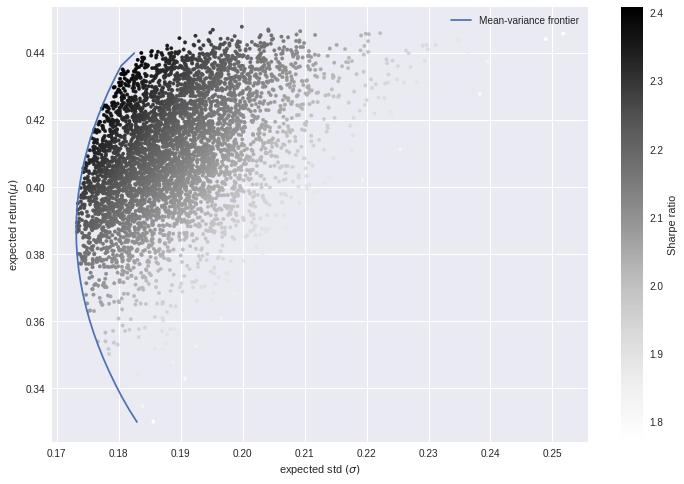

In [ ]:
plt.figure(figsize = (12, 8))
plt.scatter(port_std, port_rets, c = np.array(port_rets) / np.array(port_std),
            marker = '.')
plt.plot(tvols, trets, label = 'Mean-variance frontier')
plt.legend()
plt.grid(True)
plt.ylabel('expected return$(μ)$')
plt.xlabel('expected std $(σ)$')
plt.colorbar(label='Sharpe ratio')

2. Risk-free rate이 0.02 일때, 무위험자산까지 포함한 mean-variance frontier를 도출하고 최적 포트폴리오의 annualized sharpe-ratio를 구하시오 (1년을 252일로 계산).

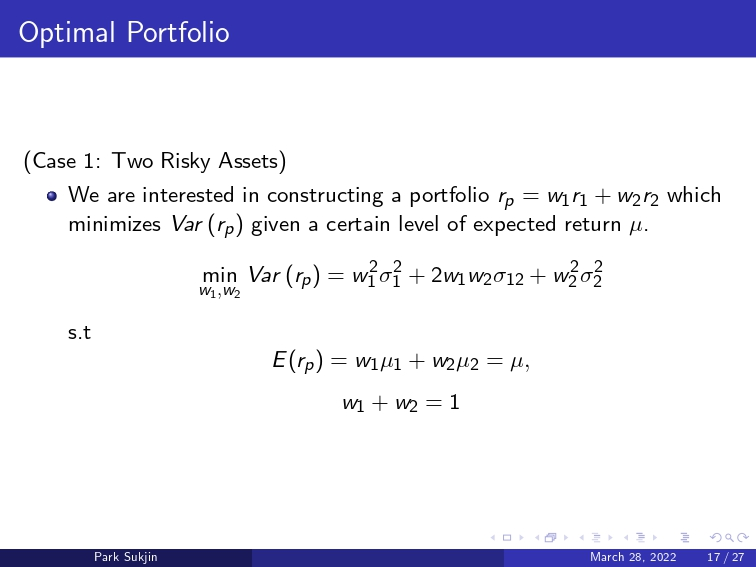

In [ ]:
# 1. N개의 위험 자산들 각각의 가중치 계산
# 2. 도출해낸 가중치들을 바탕으로 무위험자산을 포함한 포트폴리오 구성
# 3. 무위험자산과 포트폴리오간의 자산 배분 비율 계산

import scipy.optimize as opt

#5개의 위험자산들을 조합하여 Sharpe Ratio가 극대화되는 지점을 찾는 함수
def min_func_sharpe(weight, rf = 0.02) :
    return -statistics(weight, rf)[2]
    #[2] : Sharpe Ratio, -를 붙이는건 극대화 지점을 찾기 위해

cons = ({'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})
#제약식 1 : 모든 가중치들의 합은 1 / 제약식 2 : np.dot(weight, ret.mean()) -  pret

bnds = tuple([(0.6, 0.6+1e-100)] + [(0, 0.4) for x in range(noa-1)])
#범위 : 자산 1 0.6, 자산 2~5 : 0 ~ 0.4

opts = opt.minimize(min_func_sharpe, noa * [1. / noa,], method = 'SLSQP',
                    bounds = bnds, constraints = cons)

# scipy.optimize.minimize(fun, x0, args=(), method=None, bounds=None, constraints=())
# noa * [1. / noa, ] : x0 (초기 실행값)
#-> [1. / noa, ] : [1 / noa] : 리스트, [1. / noa] * noa -> noa개 만큼의 1/noa 설정
opts['x'].round(3)

array([0.6  , 0.   , 0.   , 0.208, 0.192])

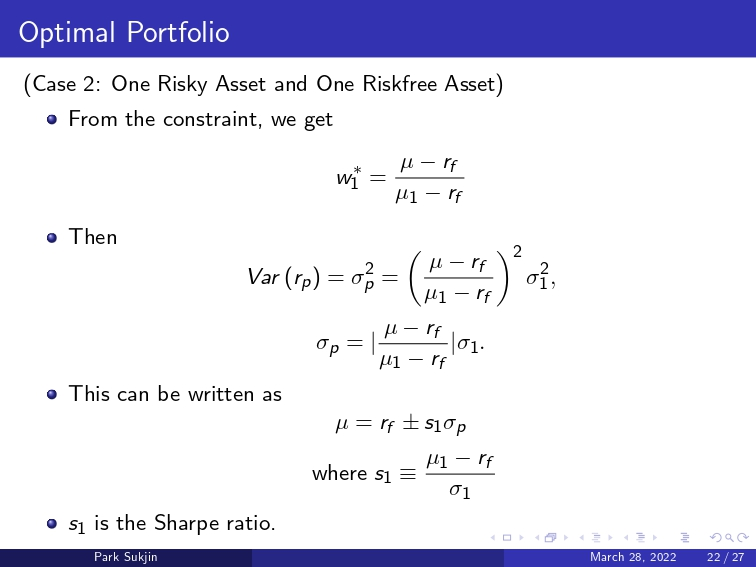

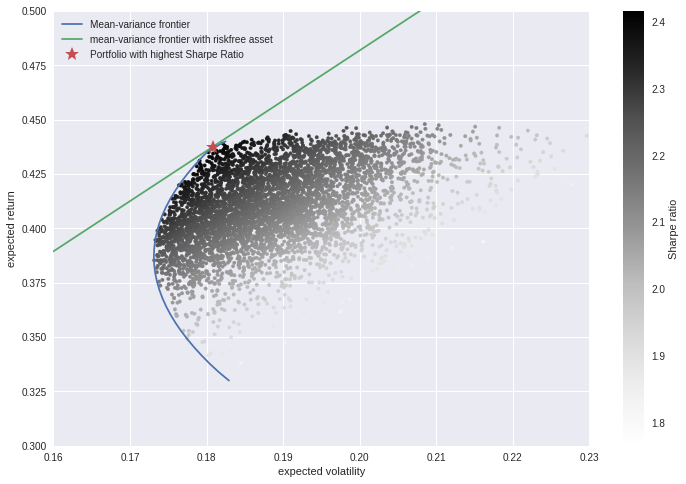

In [ ]:
rf = 0.02
slope = (statistics(opts['x'])[0] - rf) / statistics(opts['x'])[1]
# slope = Sharpe Ratio
# 최적화된 가중치 입력 : statistics(opts['x'])
# 개별자산 [0] - rf / 개별자산

var_list = [x * slope + rf for x in np.linspace(0.16, 0.24, 2500)]
# mu = slope * x + r_f (x : sigma of portfolio, 0.16 ~ 0.24)
# linspace의 범위 : 1번에서 나온 plot의 std의 범위 0.16 ~ 0.24 (샘플 개수는 자유)
# 이는 x축에 대해서도 동일하게 적용해준다 (y에서 설정한 샘플개수와 동일하게 설정한다)

x = np.linspace(0.16, 0.24, 2500)
y = var_list

plt.figure(figsize=(12, 8))

# Mean-variance frontier for only risky assets
plt.plot(tvols, trets, label = 'Mean-variance frontier')

# Random Portfolio 산포도 그리기
plt.scatter(port_std, port_rets,
            c=np.array(port_rets) / np.array(port_std), marker='.')

# CML : random portfolio which includes risk-free asset composition
# set x = (0.16, 0.24), y : mu = slope * x + r_f
plt.plot(x, y, label = 'Mean-variance frontier with riskfree asset')

# Tangency Portfolio
# random portfolio only with risky assets with highest Sharpe ratio
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0, label = 'Portfolio with highest Sharpe Ratio')
plt.xlim((0.16, 0.23))
plt.ylim((0.3, 0.5))
plt.legend()
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')   

In [ ]:
print(opts['x'].round(2))
print("이는 위험자산들 간의 비중을 나타내며, 무위험자산을 포함시킬 경우 1 - 무위험자산 비중을 곱해줘야 한다.")

[0.6  0.   0.   0.21 0.19]
이는 위험자산들 간의 비중을 나타내며, 무위험자산을 포함시킬 경우 1 - 무위험자산 비중을 곱해줘야 한다.


In [ ]:
print("Annualized Sharpe Ratio는 %.2f이다"%slope)

Annualized Sharpe Ratio는 2.31이다


3. 위의 분석들을, 이번에는 '위험자산 중 60%는 삼성전자 주식으로 구성'이라는 조건을 제외하고 다시 진행하고 새로 구한 최적 포트폴리오의 annualized sharpe-ratio를 (3-2)의 것과 비교하시오. 펀드매니저로써 고객에게 어떤 포트폴리오를 추천하겠습니까?

(1) 각 자산들의 가중치를 random하게 생성

'\nMean-variance frontier는 이 점들의 표면을 이어놓은 점들 (이라고 따로 기술하거나 직접 plot로 그려줘야 함)\n'

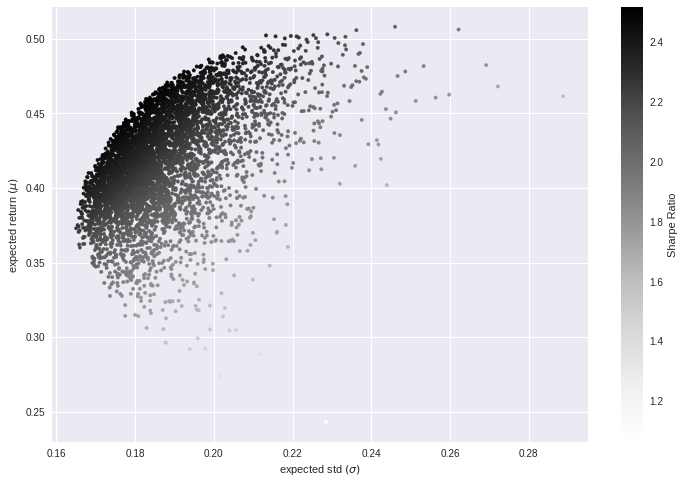

In [ ]:
ret = data.pct_change().dropna()
port_rets2 = []
port_std2 = []

def ret_std(weight, ret):
    port_mean = np.sum(weight * ret.mean() *252)
    port_var = np.dot(weight.T, np.dot(ret.cov()*252, weight))
    port_std = np.sqrt(port_var)
    return port_mean, port_std

for i in range(5000) :
    weight = np.random.random(5) #난수를 만들어줘야지!
    weight /= sum(weight) ## 헤맨 이유 : 0.4를 곱하는 식을 빼줘야지!!
    mu, sig = ret_std(weight, ret)
    port_rets2.append(mu)
    port_std2.append(sig)

sr = np.array(port_rets2) / np.array(port_std2)

plt.style.use('seaborn')
plt.figure(figsize = (12, 8))
plt.scatter(port_std2, port_rets2, 
            c = np.array(port_rets2) / np.array(port_std2),marker = '.')

plt.grid(True)
plt.ylabel('expected return $(μ)$')
plt.xlabel('expected std $(σ)$')
plt.colorbar(label = 'Sharpe Ratio')
'''
Mean-variance frontier는 이 점들의 표면을 이어놓은 점들 (이라고 따로 기술하거나 직접 plot로 그려줘야 함)
'''

(2) Mean-variance frontier 도출

In [ ]:
def statistics(weight, rf = 0) :
    weight = np.array(weight)
    pret = np.dot(weight, ret.mean()) * 252 - rf
    pvol = np.sqrt(np.dot(weight.T, np.dot(ret.cov() * 252, weight)))
    return np.array([pret, pvol, pret/pvol])
    #[0] : 기대수익률, [1] : 분산 [2] : Sharpe Ratio

def min_func_port(weight) :
    return statistics(weight)[1]
    #분산

cons = ({'type' : 'eq', 'fun' : lambda x : statistics(x)[0] - tret},
        {'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})
#제약식 1 : 포트폴리오 기대수익률 - 개별자산 기대수익률 

bnds = [(0, 1) for x in range(noa)]
#범위 : 삼전 60프로와 나머지 40프로

trets = np.linspace(0.25, 0.50, 30) #앞선 예시에서 본 범위를 linspace로 설정
tvols = []

#수익률 범위 0.1 ~ 0.22에 대해
for tret in trets :
    cons = ({'type' : 'eq', 'fun' : lambda x : statistics(x)[0] - tret}, 
            {'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})
    res = opt.minimize(min_func_port, noa * [1 / noa,], method = 'SLSQP',
                       bounds = bnds, constraints = cons)
    tvols.append(res['fun'])

tvols = np.array(tvols)
tvols

array([0.21123839, 0.20537503, 0.19986114, 0.1947264 , 0.19000131,
       0.1857178 , 0.18185154, 0.17833221, 0.1751786 , 0.17241085,
       0.17004774, 0.16810631, 0.16660075, 0.1655439 , 0.16494399,
       0.16480648, 0.16513112, 0.16589585, 0.16704542, 0.16856968,
       0.17045797, 0.17269996, 0.17528054, 0.17818503, 0.18139892,
       0.18497938, 0.1895802 , 0.19528739, 0.20200903, 0.20964692])

'\nMean-variance frontier는 이 점들의 표면을 이어놓은 점들 (이라고 따로 기술하거나 직접 plot로 그려줘야 함)\n'

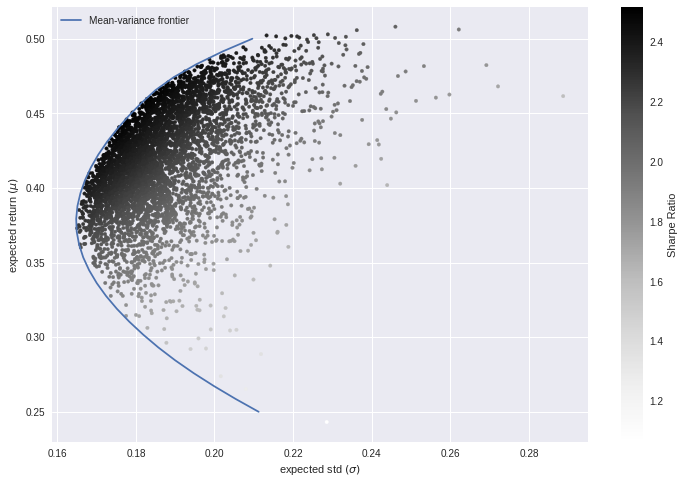

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (12, 8))

plt.scatter(port_std2, port_rets2, 
            c = np.array(port_rets2) / np.array(port_std2),marker = '.')

plt.plot(tvols, trets, label = 'Mean-variance frontier')
plt.legend()

plt.grid(True)
plt.ylabel('expected return $(μ)$')
plt.xlabel('expected std $(σ)$')
plt.colorbar(label = 'Sharpe Ratio')
'''
Mean-variance frontier는 이 점들의 표면을 이어놓은 점들 (이라고 따로 기술하거나 직접 plot로 그려줘야 함)
'''

(3) 무위험자산을 포함했을 때 Tangency Portfolio 도출

In [ ]:
# 1. N개의 위험 자산들 각각의 가중치 계산
# 2. 도출해낸 가중치들을 바탕으로 무위험자산을 포함한 포트폴리오 구성
# 3. 무위험자산과 포트폴리오간의 자산 배분 비율 계산

#5개의 위험자산들을 조합하여 Sharpe Ratio가 극대화되는 지점을 찾는 함수
def min_func_sharpe(weight, rf = 0.02) :
    return -statistics(weight, rf)[2]
    #[2] : Sharpe Ratio, -를 붙이는건 극대화 지점을 찾기 위해

cons = ({'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})
#제약식 1 : 모든 가중치들의 합은 1 / 제약식 2 : np.dot(weight, ret.mean()) -  pret

bnds = tuple([(0, 1) for x in range(noa)])

opts = opt.minimize(min_func_sharpe, noa * [1. / noa,], method = 'SLSQP',
                    bounds = bnds, constraints = cons)

# scipy.optimize.minimize(fun, x0, args=(), method=None, bounds=None, constraints=())
# noa * [1. / noa, ] : x0 (초기 실행값)
#-> [1. / noa, ] : [1 / noa] : 리스트, [1. / noa] * noa -> noa개 만큼의 1/noa 설정
opts['x'].round(3)

array([0.341, 0.   , 0.107, 0.3  , 0.253])

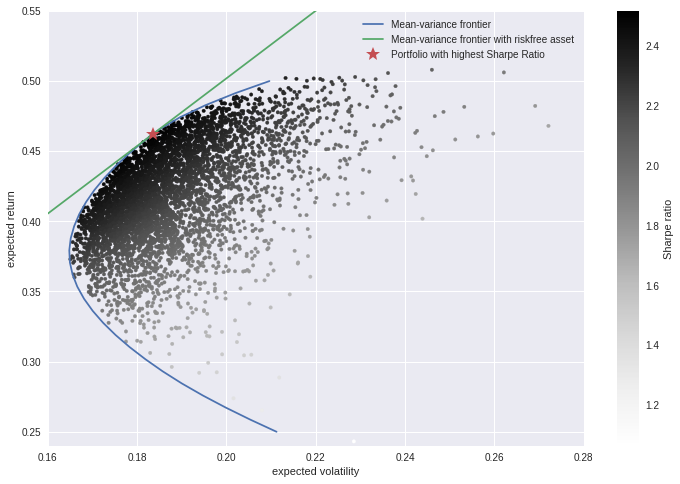

In [ ]:
rf = 0.02
slope = (statistics(opts['x'])[0] - rf) / statistics(opts['x'])[1]
# slope = Sharpe Ratio
# 최적화된 가중치 입력 : statistics(opts['x'])
# 개별자산 [0] - rf / 개별자산

var_list = [x * slope + rf for x in np.linspace(0.16, 0.28, 2500)]
# mu = slope * x + r_f (x : sigma of portfolio, 0.16 ~ 0.24)
# linspace의 범위 : 1번에서 나온 plot의 std의 범위 0.16 ~ 0.24 (샘플 개수는 자유)
# 이는 x축에 대해서도 동일하게 적용해준다 (y에서 설정한 샘플개수와 동일하게 설정한다)

x = np.linspace(0.16, 0.28, 2500)
y = var_list

plt.figure(figsize=(12, 8))

# Mean-variance frontier for only risky assets
plt.plot(tvols, trets, label = 'Mean-variance frontier')

# Random Portfolio 산포도 그리기
plt.scatter(port_std2, port_rets2, 
            c = np.array(port_rets2) / np.array(port_std2),marker = '.')

# CML : random portfolio which includes risk-free asset composition
# set x = (0.16, 0.24), y : mu = slope * x + r_f
plt.plot(x, y, label = 'Mean-variance frontier with riskfree asset')

# Tangency Portfolio
# random portfolio only with risky assets with highest Sharpe ratio
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0, label = 'Portfolio with highest Sharpe Ratio')
plt.xlim((0.16, 0.28))
plt.ylim((0.24, 0.55))
plt.legend()
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')   

In [ ]:
print("Annualized Sharpe Ratio는 %.2f이다"%slope)

Annualized Sharpe Ratio는 2.41이다
